# Overview
1. Read enriched CVE CVSS v3 data
2. Plot different scatter plots of datasets of CVEs that are weaponized or ProofOfConcept vs EPSS and CVSS Basescores

In [92]:
# Need these for the logic
import pandas as pd
import csv
import random 

# Need these for the plots
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns

In [93]:
def scatter_plot_cvss_epss(df, Title):
    g=sns.jointplot(data=df, x="BaseScore", y="epss", kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7)
    g.plot_marginals(sns.histplot, multiple="stack")
    g.fig.suptitle(Title)

# CVSS

In [94]:
df = pd.read_csv('../data_out/CVSSData_enriched.csv.gz', compression="gzip")
df

/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_76690/1015700933.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data_out/CVSSData_enriched.csv.gz', compression="gzip")


,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
0,CVE-1999-0095,1988-10-01,"The debug command in Sendmail is enabled, allo...",Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.01157,True,False,False,False,4,10.0
1,CVE-1999-0082,1988-11-11,CWD ~root command in ftpd allows root access.,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.11698,False,False,False,False,5,10.0
2,CVE-1999-1471,1989-01-01,Buffer overflow in passwd in BSD based operati...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00043,False,False,False,False,5,7.2
3,CVE-1999-1122,1989-07-26,Vulnerability in restore in SunOS 4.0.3 and ea...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00061,False,False,False,False,5,4.6
4,CVE-1999-1467,1989-10-26,Vulnerability in rcp on SunOS 4.0.x allows rem...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00425,False,False,False,False,5,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221301,CVE-2023-40411,2024-01-10,This issue was addressed with improved data pr...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,False,False,False,False,False,5,5.5
221302,CVE-2023-42826,2024-01-10,The issue was addressed with improved checks. ...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,['NVD-CWE-noinfo'],False,False,False,False,False,False,False,5,7.8
221303,CVE-2023-41987,2024-01-10,This issue was addressed with improved checks....,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,False,False,False,False,False,5,5.5
221304,CVE-2023-41994,2024-01-10,A logic issue was addressed with improved chec...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,False,False,False,False,False,5,5.5


In [95]:
# Convert the 'epps' column to float, handling non-numeric values
df['epss'] = pd.to_numeric(df['epss'], errors='coerce')

# CISA KEV

In [96]:
df_cisa_kev= df[(df["cisa_kev"] == True)]
df_cisa_kev

,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
4640,CVE-2002-0367,2002-06-25,smss.exe debugging subsystem in Windows NT and...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00092,True,True,False,False,0,7.2
8608,CVE-2004-0210,2004-08-06,The POSIX component of Microsoft Windows NT an...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00121,True,True,False,False,0,7.2
9752,CVE-2004-1464,2004-12-31,Cisco IOS 12.2(15) and earlier allows remote a...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-noinfo'],False,False,0.01795,False,True,False,False,0,5.0
13226,CVE-2005-2773,2005-09-02,HP OpenView Network Node Manager 6.2 through 7...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.96609,True,True,False,False,0,7.5
16668,CVE-2006-1547,2006-03-30,ActionForm in Apache Software Foundation (ASF)...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.01420,False,True,False,False,0,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218589,CVE-2023-49897,2023-12-06,An OS command injection vulnerability exists i...,NETWORK,LOW,LOW,NONE,UNCHANGED,HIGH,HIGH,...,['CWE-78'],False,False,0.00281,False,True,False,False,0,8.8
218816,CVE-2023-47565,2023-12-08,An OS command injection vulnerability has been...,NETWORK,LOW,LOW,NONE,UNCHANGED,HIGH,HIGH,...,['CWE-78'],False,False,0.01453,False,True,False,False,0,8.8
220223,CVE-2023-7024,2023-12-21,Heap buffer overflow in WebRTC in Google Chrom...,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,['CWE-787'],False,False,0.00361,False,True,False,True,0,8.8
220328,CVE-2023-7101,2023-12-24,Spreadsheet::ParseExcel version 0.65 is a Perl...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,['CWE-94'],False,False,0.02119,False,True,False,False,0,7.8


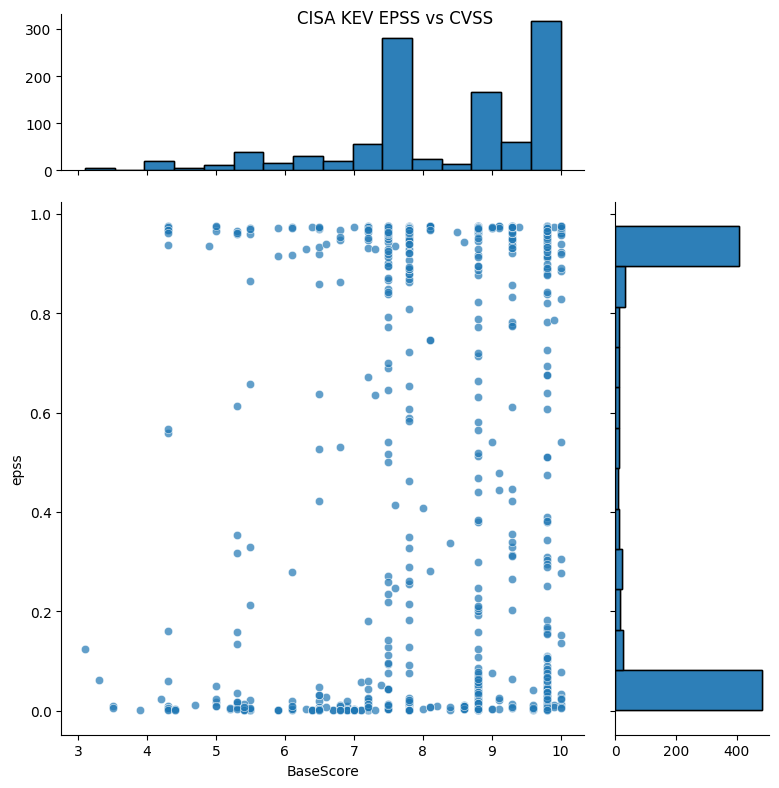

In [97]:
scatter_plot_cvss_epss(df_cisa_kev, "CISA KEV EPSS vs CVSS")

# Weaponized Exploits

In [98]:
df_weaponized= df[(df["metasploit"] == True) | (df["nuclei"] == True)]
df_weaponized

,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
8,CVE-1999-0209,1990-08-14,The SunView (SunTools) selection_svc facility ...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.01751,True,False,False,False,2,5.0
109,CVE-1999-0103,1996-02-08,"Echo and chargen, or other combinations of UDP...",Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.01326,False,False,False,False,2,5.0
182,CVE-1999-0170,1997-01-01,Remote attackers can mount an NFS file system ...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.00875,False,False,False,False,2,7.5
210,CVE-1999-0517,1997-01-01,An SNMP community name is the default (e.g. pu...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.45448,False,False,False,False,2,7.5
213,CVE-1999-0504,1997-01-01,A Windows NT local user or administrator accou...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.00546,True,False,False,False,2,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219352,CVE-2022-45365,2023-12-14,Improper Neutralization of Input During Web Pa...,NETWORK,LOW,NONE,REQUIRED,CHANGED,LOW,LOW,...,['CWE-79'],False,True,0.00096,False,False,False,False,3,6.1
219508,CVE-2023-6553,2023-12-15,The Backup Migration plugin for WordPress is v...,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,...,['NVD-CWE-noinfo'],False,True,0.45921,False,False,False,False,3,9.8
220402,CVE-2023-50968,2023-12-26,Arbitrary file properties reading vulnerabilit...,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,...,['CWE-918'],False,True,0.32266,False,False,False,False,3,7.5
220405,CVE-2023-51467,2023-12-26,The vulnerability permits attackers to circumv...,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,...,['CWE-918'],False,True,0.54475,False,False,False,False,3,9.8


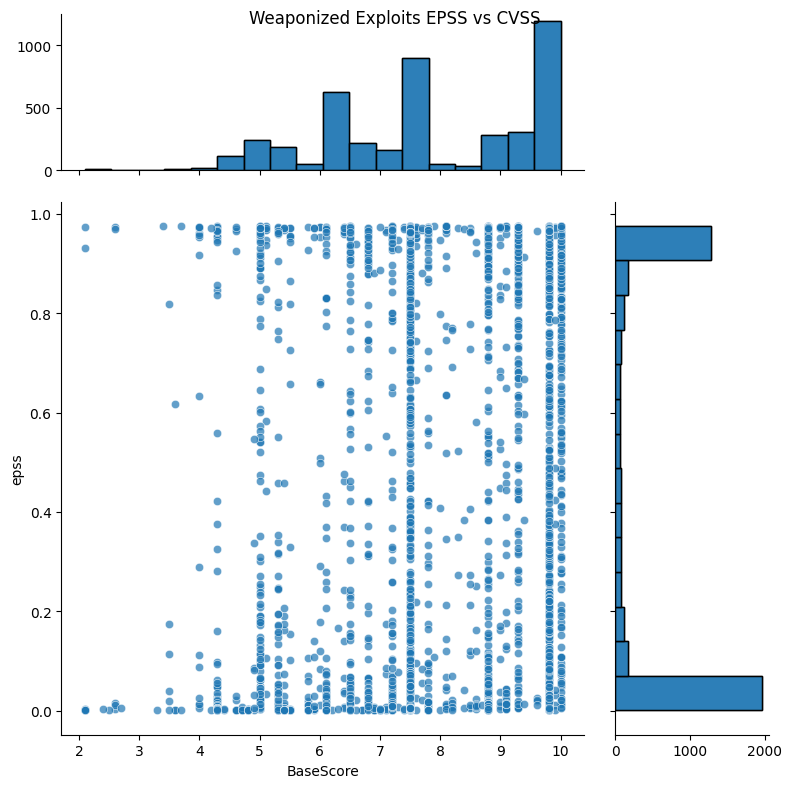

In [99]:
scatter_plot_cvss_epss(df_weaponized, "Weaponized Exploits EPSS vs CVSS")

# EPSS 


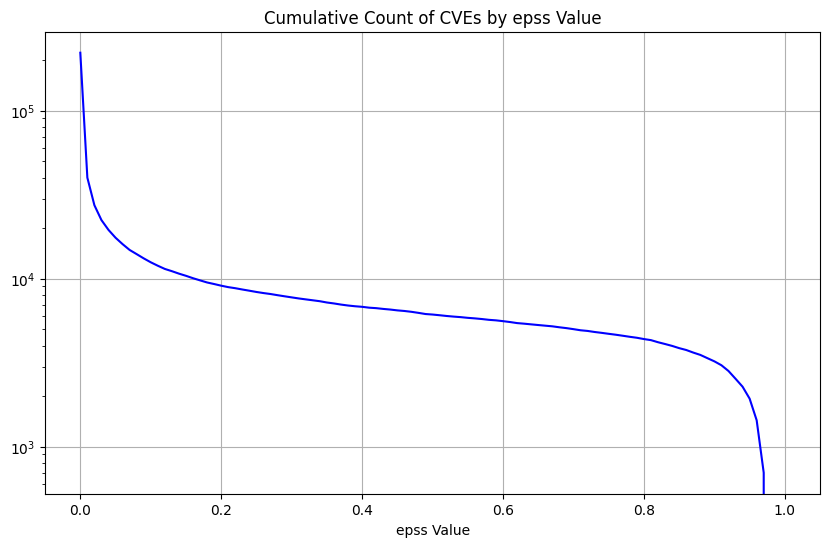

In [100]:
# Define the range of values from 0 to 1
value_range = [i / 100 for i in range(101)]  # Values from 0.00 to 1.00 in steps of 0.01

# Create a list to store the cumulative counts
cumulative_counts = []

# Calculate cumulative counts for each value in the range
for value in value_range:
    cumulative_count = (df['epss'] >= value).sum()
    cumulative_counts.append(cumulative_count)

# Create a cumulative histogram
plt.figure(figsize=(10, 6))
plt.plot(value_range, cumulative_counts,  linestyle='-', color='b')
plt.title('Cumulative Count of CVEs by epss Value')
plt.xlabel('epss Value')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [101]:
df_active = df[df['cisa_kev']]
df_active

,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
4640,CVE-2002-0367,2002-06-25,smss.exe debugging subsystem in Windows NT and...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00092,True,True,False,False,0,7.2
8608,CVE-2004-0210,2004-08-06,The POSIX component of Microsoft Windows NT an...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00121,True,True,False,False,0,7.2
9752,CVE-2004-1464,2004-12-31,Cisco IOS 12.2(15) and earlier allows remote a...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-noinfo'],False,False,0.01795,False,True,False,False,0,5.0
13226,CVE-2005-2773,2005-09-02,HP OpenView Network Node Manager 6.2 through 7...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.96609,True,True,False,False,0,7.5
16668,CVE-2006-1547,2006-03-30,ActionForm in Apache Software Foundation (ASF)...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.01420,False,True,False,False,0,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218589,CVE-2023-49897,2023-12-06,An OS command injection vulnerability exists i...,NETWORK,LOW,LOW,NONE,UNCHANGED,HIGH,HIGH,...,['CWE-78'],False,False,0.00281,False,True,False,False,0,8.8
218816,CVE-2023-47565,2023-12-08,An OS command injection vulnerability has been...,NETWORK,LOW,LOW,NONE,UNCHANGED,HIGH,HIGH,...,['CWE-78'],False,False,0.01453,False,True,False,False,0,8.8
220223,CVE-2023-7024,2023-12-21,Heap buffer overflow in WebRTC in Google Chrom...,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,['CWE-787'],False,False,0.00361,False,True,False,True,0,8.8
220328,CVE-2023-7101,2023-12-24,Spreadsheet::ParseExcel version 0.65 is a Perl...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,['CWE-94'],False,False,0.02119,False,True,False,False,0,7.8


In [102]:
# Weaponized OR active
df_weaponized_active = df[(df['cisa_kev'] | df['metasploit'] | df['nuclei'])]
df_weaponized_active

,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
8,CVE-1999-0209,1990-08-14,The SunView (SunTools) selection_svc facility ...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.01751,True,False,False,False,2,5.0
109,CVE-1999-0103,1996-02-08,"Echo and chargen, or other combinations of UDP...",Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.01326,False,False,False,False,2,5.0
182,CVE-1999-0170,1997-01-01,Remote attackers can mount an NFS file system ...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.00875,False,False,False,False,2,7.5
210,CVE-1999-0517,1997-01-01,An SNMP community name is the default (e.g. pu...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.45448,False,False,False,False,2,7.5
213,CVE-1999-0504,1997-01-01,A Windows NT local user or administrator accou...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.00546,True,False,False,False,2,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,CVE-2023-7101,2023-12-24,Spreadsheet::ParseExcel version 0.65 is a Perl...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,['CWE-94'],False,False,0.02119,False,True,False,False,0,7.8
220402,CVE-2023-50968,2023-12-26,Arbitrary file properties reading vulnerabilit...,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,...,['CWE-918'],False,True,0.32266,False,False,False,False,3,7.5
220405,CVE-2023-51467,2023-12-26,The vulnerability permits attackers to circumv...,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,...,['CWE-918'],False,True,0.54475,False,False,False,False,3,9.8
221208,CVE-2022-45354,2024-01-08,Exposure of Sensitive Information to an Unauth...,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,True,0.00553,False,False,False,False,3,7.5


In [103]:
# POC exploit OR Weaponized OR active
df_exploitpoc_weaponized_active  = df[df['exploitdb'] | df['cisa_kev'] | df['metasploit'] | df['nuclei']]
df_exploitpoc_weaponized_active


,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
0,CVE-1999-0095,1988-10-01,"The debug command in Sendmail is enabled, allo...",Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.01157,True,False,False,False,4,10.0
8,CVE-1999-0209,1990-08-14,The SunView (SunTools) selection_svc facility ...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],True,False,0.01751,True,False,False,False,2,5.0
20,CVE-1999-1194,1991-05-01,chroot in Digital Ultrix 4.1 and 4.0 is insecu...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00042,True,False,False,False,4,7.2
22,CVE-1999-1123,1991-05-20,The installation of Sun Source (sunsrc) tapes ...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00045,True,False,False,False,4,7.2
65,CVE-1999-0113,1994-05-23,Some implementations of rlogin allow root acce...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.93324,True,False,False,False,4,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,CVE-2023-7101,2023-12-24,Spreadsheet::ParseExcel version 0.65 is a Perl...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,['CWE-94'],False,False,0.02119,False,True,False,False,0,7.8
220402,CVE-2023-50968,2023-12-26,Arbitrary file properties reading vulnerabilit...,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,...,['CWE-918'],False,True,0.32266,False,False,False,False,3,7.5
220405,CVE-2023-51467,2023-12-26,The vulnerability permits attackers to circumv...,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,...,['CWE-918'],False,True,0.54475,False,False,False,False,3,9.8
221208,CVE-2022-45354,2024-01-08,Exposure of Sensitive Information to an Unauth...,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,True,0.00553,False,False,False,False,3,7.5


###
Use a log scale on y axis to see lower y range (counts) better

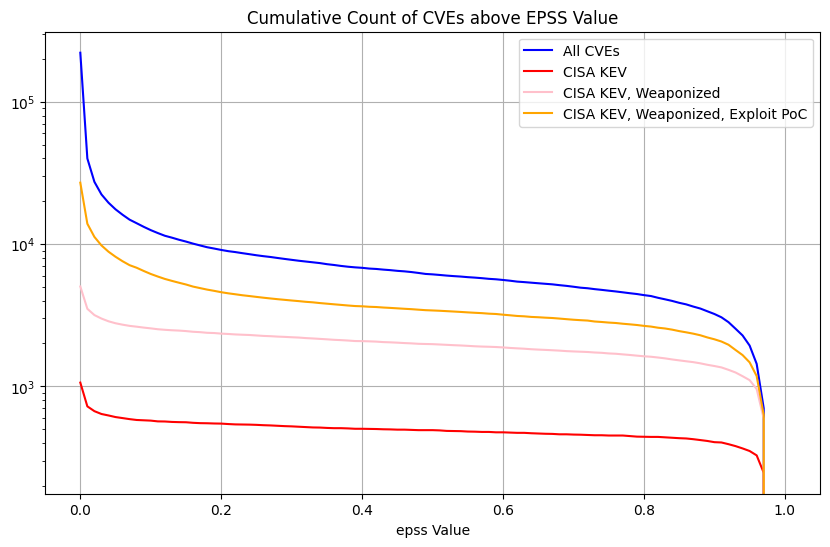

In [104]:
# Define the range of values from 0 to 1
value_range = [i / 100 for i in range(101)]  # Values from 0.00 to 1.00 in steps of 0.01

# Calculate cumulative counts for each value in the range
cumulative_counts= []
for value in value_range:
    cumulative_count = (df['epss'] >= value).sum()
    cumulative_counts.append(cumulative_count)

# Calculate cumulative counts for each value in the range
cumulative_counts_active= []
for value in value_range:
    cumulative_count = (df_active['epss'] >= value).sum()
    cumulative_counts_active.append(cumulative_count)
    
# Calculate cumulative counts for each value in the range
cumulative_counts_weaponized_active= []
for value in value_range:
    cumulative_count = (df_weaponized_active['epss'] >= value).sum()
    cumulative_counts_weaponized_active.append(cumulative_count)

# Calculate cumulative counts for each value in the range
cumulative_counts_exploitpoc= []
for value in value_range:
    cumulative_count = (df_exploitpoc_weaponized_active['epss'] >= value).sum()
    cumulative_counts_exploitpoc.append(cumulative_count)
    
# Create a cumulative histogram
plt.figure(figsize=(10, 6))
plt.plot(value_range, cumulative_counts,  linestyle='-', color='b', label='All CVEs')
plt.plot(value_range, cumulative_counts_active,  linestyle='-', color='r', label='CISA KEV')
plt.plot(value_range, cumulative_counts_weaponized_active,  linestyle='-', color='pink', label='CISA KEV, Weaponized')
plt.plot(value_range, cumulative_counts_exploitpoc,  linestyle='-', color='orange', label='CISA KEV, Weaponized, Exploit PoC')

plt.title('Cumulative Count of CVEs above EPSS Value')
plt.xlabel('epss Value')
plt.yscale('log')  # Set y-axis to logarithmic scale
#plt.yscale('linear')  # Set y-axis to logarithmic scale
plt.legend()  # Show legend for line labels

plt.grid(True)
plt.show()

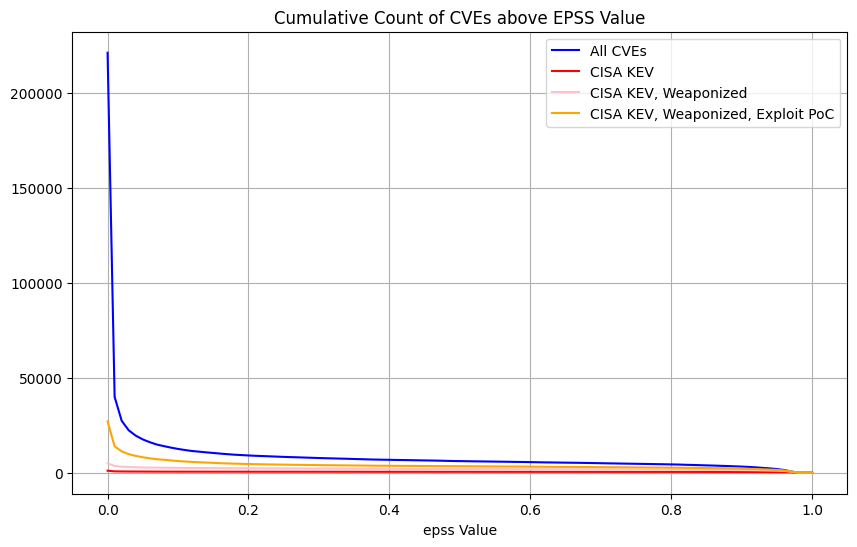

In [105]:
# Create a cumulative histogram
plt.figure(figsize=(10, 6))
plt.plot(value_range, cumulative_counts,  linestyle='-', color='b', label='All CVEs')
plt.plot(value_range, cumulative_counts_active,  linestyle='-', color='r', label='CISA KEV')
plt.plot(value_range, cumulative_counts_weaponized_active,  linestyle='-', color='pink', label='CISA KEV, Weaponized')
plt.plot(value_range, cumulative_counts_exploitpoc,  linestyle='-', color='orange', label='CISA KEV, Weaponized, Exploit PoC')

plt.title('Cumulative Count of CVEs above EPSS Value')
plt.xlabel('epss Value')
plt.yscale('linear')  # Set y-axis to logarithmic scale
plt.xscale('linear')  # Set y-axis to logarithmic scale

plt.legend()  # Show legend for line labels

plt.grid(True)
plt.show()

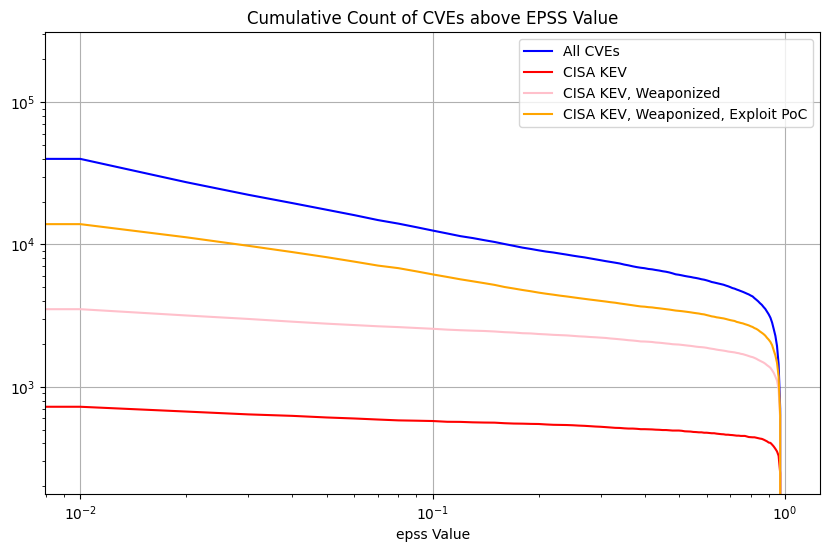

In [106]:
    
# Create a cumulative histogram
plt.figure(figsize=(10, 6))
plt.plot(value_range, cumulative_counts,  linestyle='-', color='b', label='All CVEs')
plt.plot(value_range, cumulative_counts_active,  linestyle='-', color='r', label='CISA KEV')
plt.plot(value_range, cumulative_counts_weaponized_active,  linestyle='-', color='pink', label='CISA KEV, Weaponized')
plt.plot(value_range, cumulative_counts_exploitpoc,  linestyle='-', color='orange', label='CISA KEV, Weaponized, Exploit PoC')

plt.title('Cumulative Count of CVEs above EPSS Value')
plt.xlabel('epss Value')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xscale('log')  # Set y-axis to logarithmic scale

plt.legend()  # Show legend for line labels

plt.grid(True)
plt.show()

### Only plot from EPSS 0.1 to 1.0 
So we zoom in on that range

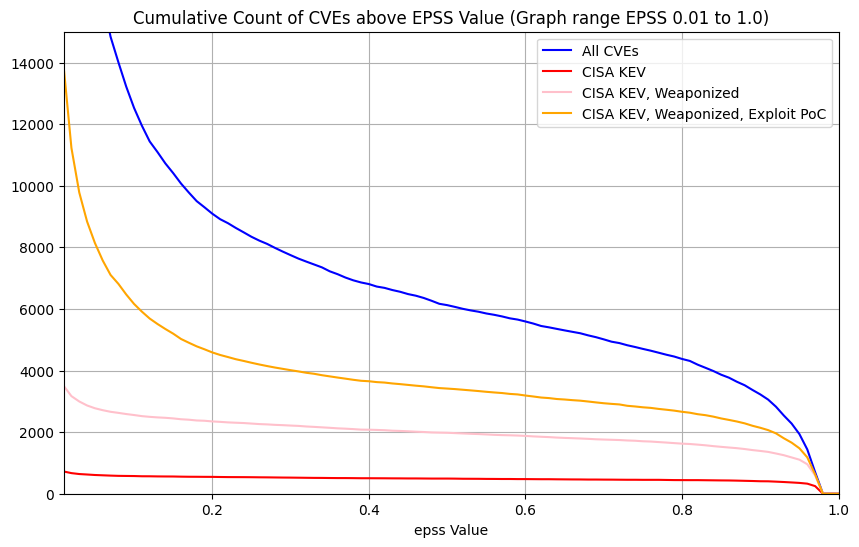

In [107]:

    
# Create a cumulative histogram
plt.figure(figsize=(10, 6))
plt.plot(value_range, cumulative_counts,  linestyle='-', color='b', label='All CVEs')
plt.plot(value_range, cumulative_counts_active,  linestyle='-', color='r', label='CISA KEV')
plt.plot(value_range, cumulative_counts_weaponized_active,  linestyle='-', color='pink', label='CISA KEV, Weaponized')
plt.plot(value_range, cumulative_counts_exploitpoc,  linestyle='-', color='orange', label='CISA KEV, Weaponized, Exploit PoC')

plt.title('Cumulative Count of CVEs above EPSS Value (Graph range EPSS 0.01 to 1.0)')
plt.xlabel('epss Value')
plt.yscale('linear')  # Set y-axis to logarithmic scale
#plt.yscale('linear')  # Set y-axis to logarithmic scale
plt.xlim(0.01, 1)  # Set the x-axis limits from 0.1 to 1
plt.ylim(0, 15000)  # Set the x-axis limits from 0.1 to 1
plt.legend()  # Show legend for line labels
plt.grid(True)
plt.show()

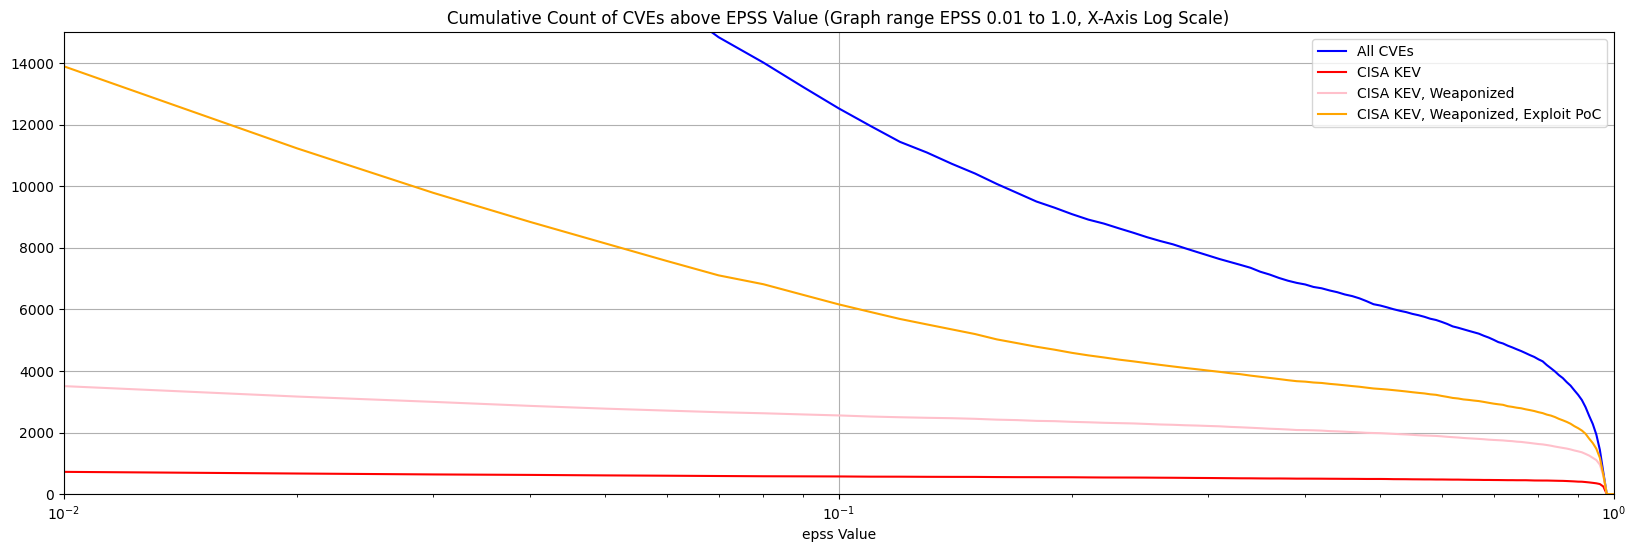

In [108]:

    
# Create a cumulative histogram
plt.figure(figsize=(20, 6))
plt.plot(value_range, cumulative_counts,  linestyle='-', color='b', label='All CVEs')
plt.plot(value_range, cumulative_counts_active,  linestyle='-', color='r', label='CISA KEV')
plt.plot(value_range, cumulative_counts_weaponized_active,  linestyle='-', color='pink', label='CISA KEV, Weaponized')
plt.plot(value_range, cumulative_counts_exploitpoc,  linestyle='-', color='orange', label='CISA KEV, Weaponized, Exploit PoC')

plt.title('Cumulative Count of CVEs above EPSS Value (Graph range EPSS 0.01 to 1.0, X-Axis Log Scale)')
plt.xlabel('epss Value')
plt.xscale('log')  # Set y-axis to logarithmic scale
plt.yscale('linear')  # Set y-axis to logarithmic scale
plt.xlim(0.01, 1)  # Set the x-axis limits from 0.1 to 1
plt.ylim(0, 15000)  # Set the x-axis limits from 0.1 to 1
plt.legend()  # Show legend for line labels
plt.grid(True)
plt.show()

# Monte Carlo Analysis
* We're more interested in a sample of CVEs (not all CVEs) e.g. the sample in our organization which will likely be a much smaller subset of all CVEs.
* Each organization will have a different subset of CVEs, and this data is private, so we can't do an analysis of that.
* A typical enterprise will have ~10K's of CVE i.e. we know the counts of CVEs - but not the CVEs themselves.
* So we can plot a random sample of that count of CVEs, and repeat many times to see what the overall plot looks likes and if it is useful.



In [109]:
df

,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
0,CVE-1999-0095,1988-10-01,"The debug command in Sendmail is enabled, allo...",Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.01157,True,False,False,False,4,10.0
1,CVE-1999-0082,1988-11-11,CWD ~root command in ftpd allows root access.,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.11698,False,False,False,False,5,10.0
2,CVE-1999-1471,1989-01-01,Buffer overflow in passwd in BSD based operati...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00043,False,False,False,False,5,7.2
3,CVE-1999-1122,1989-07-26,Vulnerability in restore in SunOS 4.0.3 and ea...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00061,False,False,False,False,5,4.6
4,CVE-1999-1467,1989-10-26,Vulnerability in rcp on SunOS 4.0.x allows rem...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00425,False,False,False,False,5,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221301,CVE-2023-40411,2024-01-10,This issue was addressed with improved data pr...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,NaN,False,False,False,False,5,5.5
221302,CVE-2023-42826,2024-01-10,The issue was addressed with improved checks. ...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,['NVD-CWE-noinfo'],False,False,NaN,False,False,False,False,5,7.8
221303,CVE-2023-41987,2024-01-10,This issue was addressed with improved checks....,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,NaN,False,False,False,False,5,5.5
221304,CVE-2023-41994,2024-01-10,A logic issue was addressed with improved chec...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,NaN,False,False,False,False,5,5.5


In [110]:
# num_iterations: Number of Monte Carlo iterations
# sample_percent: what % of CVEs as sample size e.g. the number of CVEs in an enterprise
# x_lower_lim: used to zoom in on x axis
# y_upper_lim: used to zoom in on y axis
# yscale: linear/log
# xscale: linear/log
def plot_count_of_cves_above_epss (df, Title, num_iterations=10000, sample_percent=20, xscale="linear", yscale="linear", x_lower_lim=0.00, y_upper_lim=0):
    # Define the range of values from 0 to 1
    value_range = [i / 100 for i in range(101)]  # Values from 0.00 to 1.00 in steps of 0.01
    
    # Create a list to store all cumulative counts for each iteration
    all_cumulative_counts = []

    # Perform Monte Carlo iterations
    for _ in range(num_iterations):
        # Calculate the number of rows to sample
        sample_size = int(len(df) * (sample_percent/100))

        # Randomly select sample_size % of rows
        random_indices = random.sample(range(len(df)), sample_size)
        sampled_df = df.iloc[random_indices]

        # Create a list to store the cumulative counts for the sampled data
        cumulative_counts = []

        # Calculate cumulative counts for each value in the range using the sampled data
        for value in value_range:
            cumulative_count = (sampled_df['epss'] >= value).sum()
            cumulative_counts.append(cumulative_count)

        # Append the cumulative counts for this iteration to the list
        all_cumulative_counts.append(cumulative_counts)

    # Calculate the average cumulative counts over all iterations
    average_cumulative_counts = [sum(counts) / num_iterations for counts in zip(*all_cumulative_counts)]


    # Create the cumulative histogram with all individual results and the average result
    plt.figure(figsize=(10, 6))
    for cumulative_counts in all_cumulative_counts:
        plt.plot(value_range, cumulative_counts, linestyle='-', color='gray', alpha=0.3)  # Individual results
    #plt.plot(value_range, average_cumulative_counts,  linestyle='-', color='b', label='Average Cumulative Counts')
    plt.title(Title)
    plt.xlabel('EPSS Value')
    plt.ylabel('Count')
    plt.yscale(yscale)
    plt.grid(True)
    plt.xlim(x_lower_lim, 1)  # Set the x-axis limits to zoom in on values above x
    plt.ylim(0, y_upper_lim) if y_upper_lim != 0 else None # use y_limit if not zero to zoom in
    plt.show()
    
    return all_cumulative_counts

# 1 Sample of .5% (~1.1K)

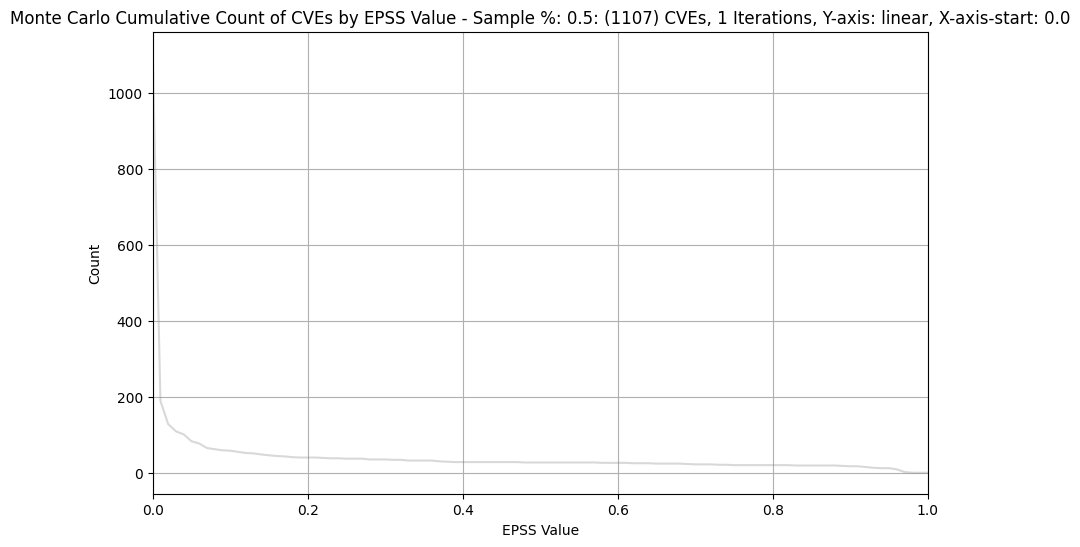

In [112]:
parameters = {'num_iterations': 1, 'sample_percent': .5, 'x_lower_lim': 0.0, 'y_upper_lim': 0, 'yscale': "linear", 'xscale': "linear"}
cve_count = round((parameters["sample_percent"]/100)*len(df))
Title = f'Monte Carlo Cumulative Count of CVEs by EPSS Value - Sample %: {parameters["sample_percent"]}: ({cve_count}) CVEs, {parameters["num_iterations"]} Iterations, Y-axis: {parameters["yscale"]}, X-axis-start: {parameters["x_lower_lim"]}'
all_cumulative_counts = plot_count_of_cves_above_epss (df, Title, **parameters)

# 100 Samples of .5% (~1.1K)

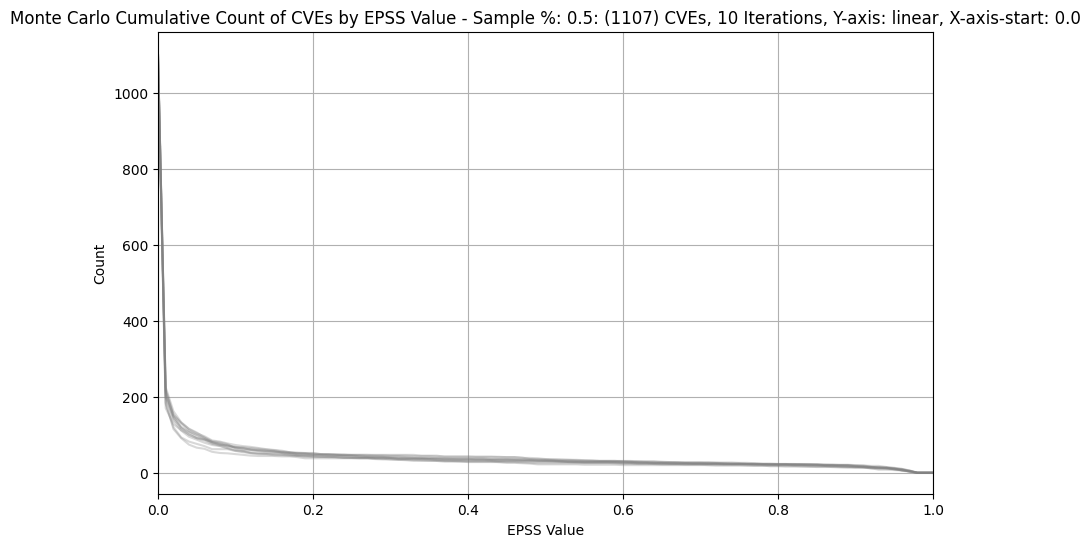

In [113]:
parameters = {'num_iterations': 10, 'sample_percent': .5, 'x_lower_lim': 0.0, 'y_upper_lim': 0, 'yscale': "linear", 'xscale': "linear"}
cve_count = round((parameters["sample_percent"]/100)*len(df))
Title = f'Monte Carlo Cumulative Count of CVEs by EPSS Value - Sample %: {parameters["sample_percent"]}: ({cve_count}) CVEs, {parameters["num_iterations"]} Iterations, Y-axis: {parameters["yscale"]}, X-axis-start: {parameters["x_lower_lim"]}'
all_cumulative_counts = plot_count_of_cves_above_epss (df, Title, **parameters)

# 10,000 Samples of .5% Sample (~1.1K)

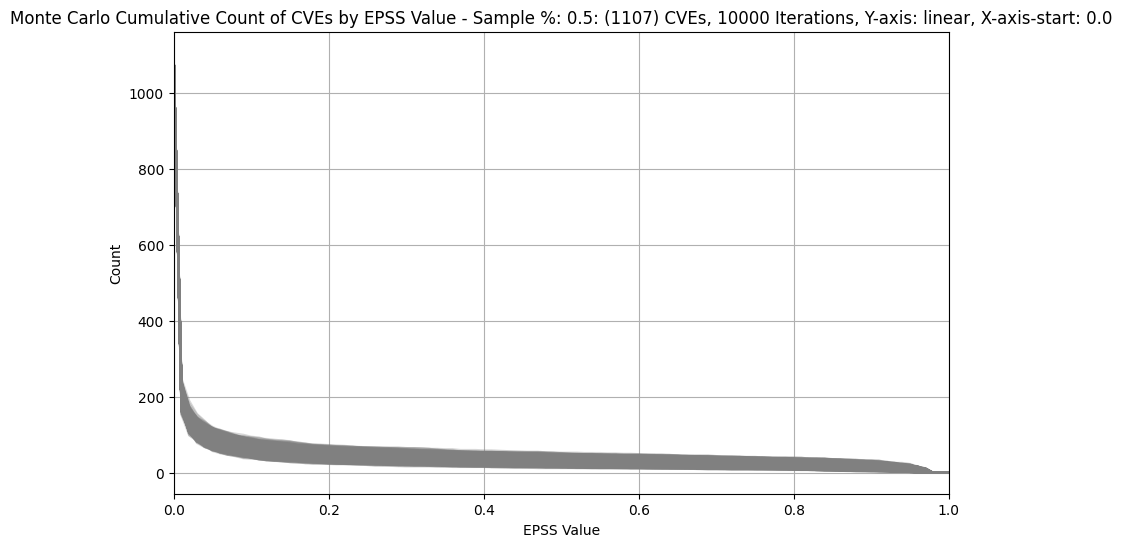

In [114]:
parameters = {'num_iterations': 10000, 'sample_percent': .5, 'x_lower_lim': 0.0, 'y_upper_lim': 0, 'yscale': "linear", 'xscale': "linear"}
cve_count = round((parameters["sample_percent"]/100)*len(df))
Title = f'Monte Carlo Cumulative Count of CVEs by EPSS Value - Sample %: {parameters["sample_percent"]}: ({cve_count}) CVEs, {parameters["num_iterations"]} Iterations, Y-axis: {parameters["yscale"]}, X-axis-start: {parameters["x_lower_lim"]}'
all_cumulative_counts = plot_count_of_cves_above_epss (df, Title, **parameters)

# 5% Sample (~11K)

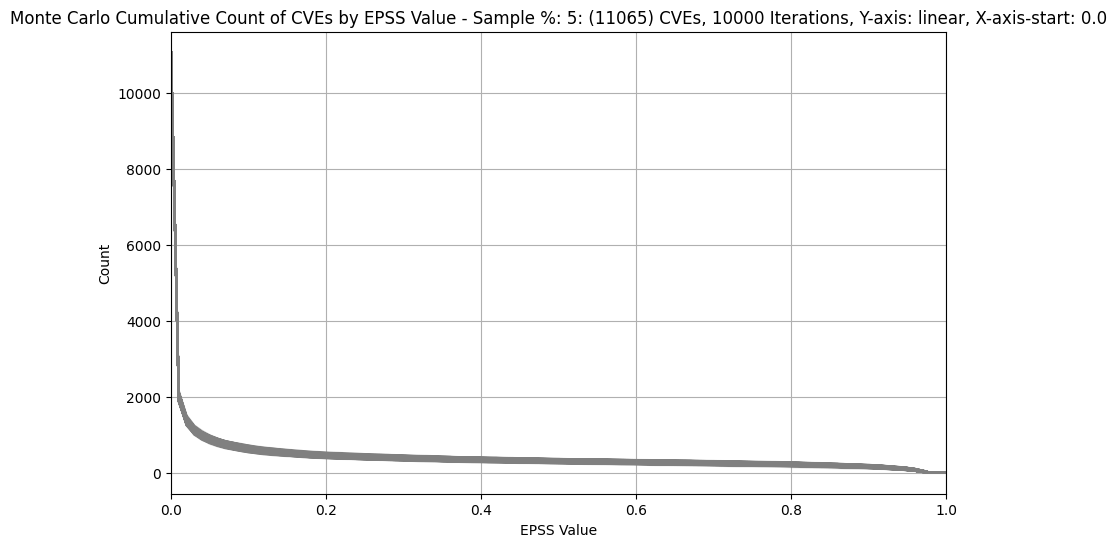

In [115]:
parameters = {'num_iterations': 10000, 'sample_percent': 5, 'x_lower_lim': 0.0, 'y_upper_lim': 0, 'yscale': "linear", 'xscale': "linear"}
cve_count = round((parameters["sample_percent"]/100)*len(df))
Title = f'Monte Carlo Cumulative Count of CVEs by EPSS Value - Sample %: {parameters["sample_percent"]}: ({cve_count}) CVEs, {parameters["num_iterations"]} Iterations, Y-axis: {parameters["yscale"]}, X-axis-start: {parameters["x_lower_lim"]}'
all_cumulative_counts = plot_count_of_cves_above_epss (df, Title, **parameters)

# 20% Sample (~44K)

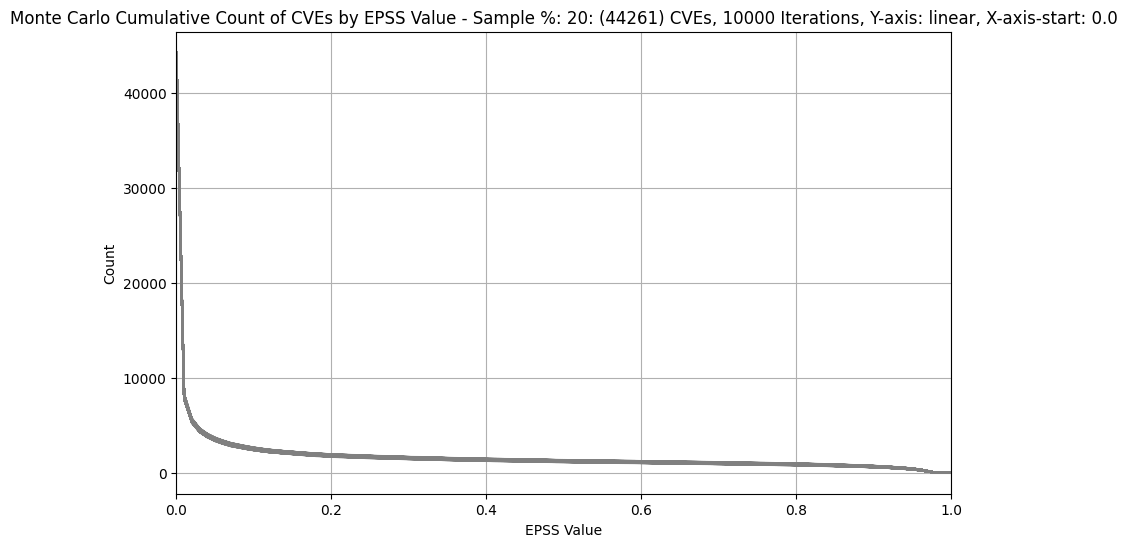

In [116]:
parameters = {'num_iterations': 10000, 'sample_percent': 20, 'x_lower_lim': 0.0, 'y_upper_lim': 0, 'yscale': "linear", 'xscale': "linear"}
cve_count = round((parameters["sample_percent"]/100)*len(df))
Title = f'Monte Carlo Cumulative Count of CVEs by EPSS Value - Sample %: {parameters["sample_percent"]}: ({cve_count}) CVEs, {parameters["num_iterations"]} Iterations, Y-axis: {parameters["yscale"]}, X-axis-start: {parameters["x_lower_lim"]}'
all_cumulative_counts = plot_count_of_cves_above_epss (df, Title, **parameters)

# 20% Sample (~44K) Zoom In

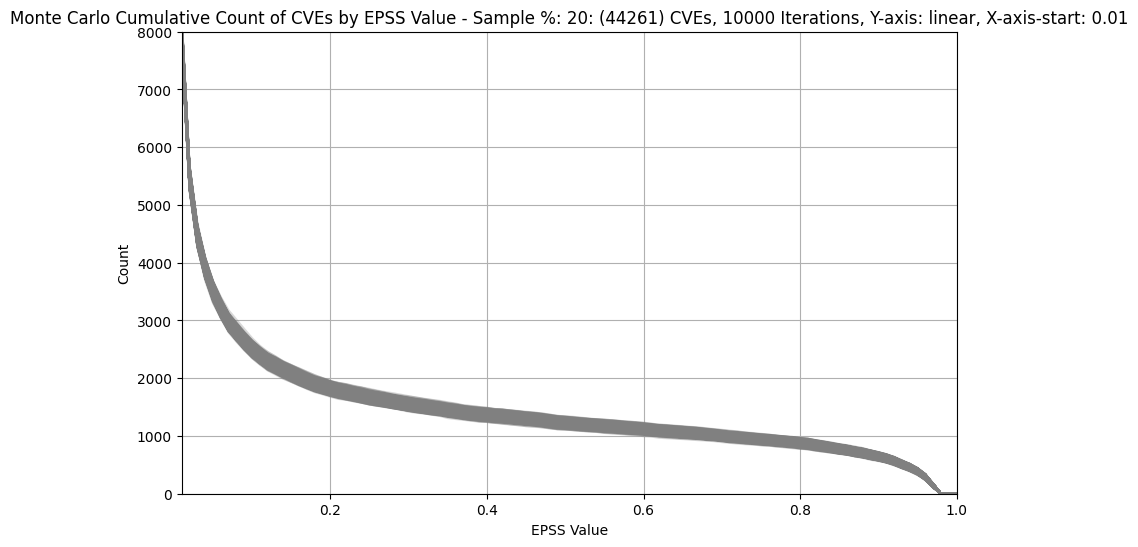

In [117]:
parameters = {'num_iterations': 10000, 'sample_percent': 20, 'x_lower_lim': 0.01, 'y_upper_lim': 8000, 'yscale': "linear", 'xscale': "linear"}
cve_count = round((parameters["sample_percent"]/100)*len(df))
Title = f'Monte Carlo Cumulative Count of CVEs by EPSS Value - Sample %: {parameters["sample_percent"]}: ({cve_count}) CVEs, {parameters["num_iterations"]} Iterations, Y-axis: {parameters["yscale"]}, X-axis-start: {parameters["x_lower_lim"]}'
all_cumulative_counts = plot_count_of_cves_above_epss (df, Title, **parameters)

### Zoom in 

# 10K samples, EPSS > 0.1 to see width of band

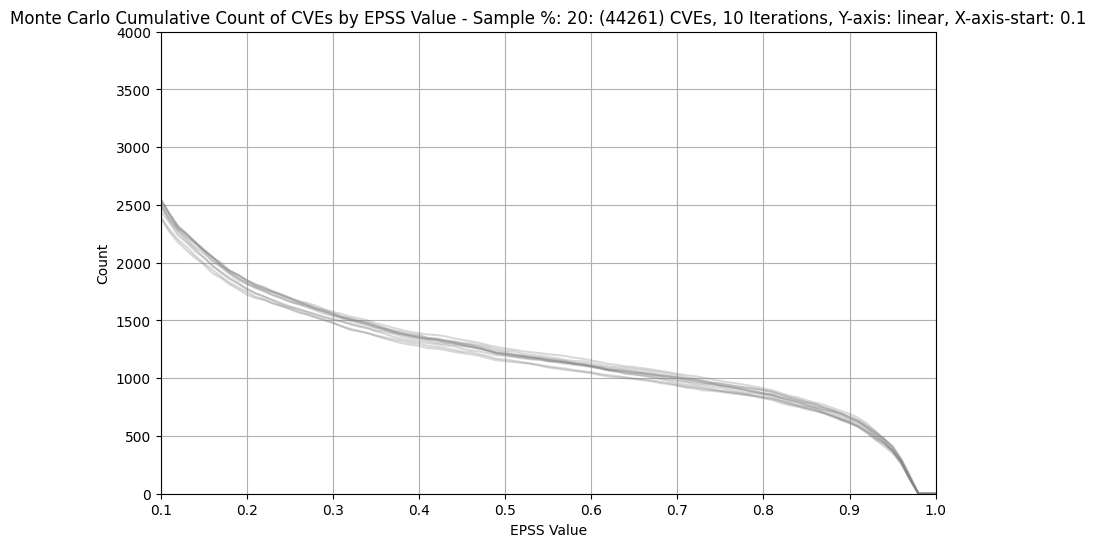

In [118]:
parameters = {'num_iterations': 10, 'sample_percent': 20, 'x_lower_lim': 0.1, 'y_upper_lim': 4000, 'yscale': "linear", 'xscale': "linear"}
cve_count = round((parameters["sample_percent"]/100)*len(df))
Title = f'Monte Carlo Cumulative Count of CVEs by EPSS Value - Sample %: {parameters["sample_percent"]}: ({cve_count}) CVEs, {parameters["num_iterations"]} Iterations, Y-axis: {parameters["yscale"]}, X-axis-start: {parameters["x_lower_lim"]}'
all_cumulative_counts = plot_count_of_cves_above_epss (df, Title, **parameters)

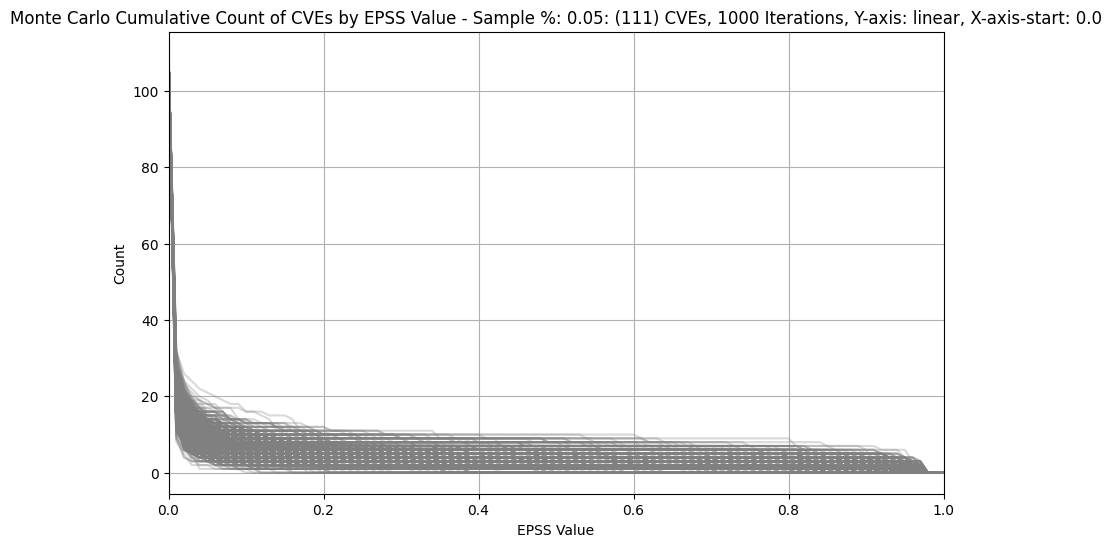

In [119]:
parameters = {'num_iterations': 1000, 'sample_percent': .05, 'x_lower_lim': 0.0, 'y_upper_lim': 0, 'yscale': "linear", 'xscale': "linear"}
cve_count = round((parameters["sample_percent"]/100)*len(df))
Title = f'Monte Carlo Cumulative Count of CVEs by EPSS Value - Sample %: {parameters["sample_percent"]}: ({cve_count}) CVEs, {parameters["num_iterations"]} Iterations, Y-axis: {parameters["yscale"]}, X-axis-start: {parameters["x_lower_lim"]}'
all_cumulative_counts = plot_count_of_cves_above_epss (df, Title, **parameters)

# Remove CVEs that have weaponized exploits or evidence of exploitation in the wild
* Per our policy, we're going to fix (weaponized exploits or exploits with evidence of exploitation in the wild) anyway regardless of EPSS score.
* So we're interested in which ones we'd need to fix because of EPSS score (that we choose).

In [120]:
df

,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
0,CVE-1999-0095,1988-10-01,"The debug command in Sendmail is enabled, allo...",Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.01157,True,False,False,False,4,10.0
1,CVE-1999-0082,1988-11-11,CWD ~root command in ftpd allows root access.,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.11698,False,False,False,False,5,10.0
2,CVE-1999-1471,1989-01-01,Buffer overflow in passwd in BSD based operati...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00043,False,False,False,False,5,7.2
3,CVE-1999-1122,1989-07-26,Vulnerability in restore in SunOS 4.0.3 and ea...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00061,False,False,False,False,5,4.6
4,CVE-1999-1467,1989-10-26,Vulnerability in rcp on SunOS 4.0.x allows rem...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00425,False,False,False,False,5,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221301,CVE-2023-40411,2024-01-10,This issue was addressed with improved data pr...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,NaN,False,False,False,False,5,5.5
221302,CVE-2023-42826,2024-01-10,The issue was addressed with improved checks. ...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,['NVD-CWE-noinfo'],False,False,NaN,False,False,False,False,5,7.8
221303,CVE-2023-41987,2024-01-10,This issue was addressed with improved checks....,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,NaN,False,False,False,False,5,5.5
221304,CVE-2023-41994,2024-01-10,A logic issue was addressed with improved chec...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,NaN,False,False,False,False,5,5.5


In [121]:
filtered_df = df[~(df['cisa_kev'] | df['metasploit'] | df['nuclei'])]
filtered_df

,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
0,CVE-1999-0095,1988-10-01,"The debug command in Sendmail is enabled, allo...",Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.01157,True,False,False,False,4,10.0
1,CVE-1999-0082,1988-11-11,CWD ~root command in ftpd allows root access.,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.11698,False,False,False,False,5,10.0
2,CVE-1999-1471,1989-01-01,Buffer overflow in passwd in BSD based operati...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00043,False,False,False,False,5,7.2
3,CVE-1999-1122,1989-07-26,Vulnerability in restore in SunOS 4.0.3 and ea...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00061,False,False,False,False,5,4.6
4,CVE-1999-1467,1989-10-26,Vulnerability in rcp on SunOS 4.0.x allows rem...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00425,False,False,False,False,5,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221300,CVE-2023-40430,2024-01-10,A logic issue was addressed with improved chec...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,NaN,False,False,False,False,5,5.5
221301,CVE-2023-40411,2024-01-10,This issue was addressed with improved data pr...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,NaN,False,False,False,False,5,5.5
221302,CVE-2023-42826,2024-01-10,The issue was addressed with improved checks. ...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,...,['NVD-CWE-noinfo'],False,False,NaN,False,False,False,False,5,7.8
221303,CVE-2023-41987,2024-01-10,This issue was addressed with improved checks....,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,NONE,...,['NVD-CWE-noinfo'],False,False,NaN,False,False,False,False,5,5.5


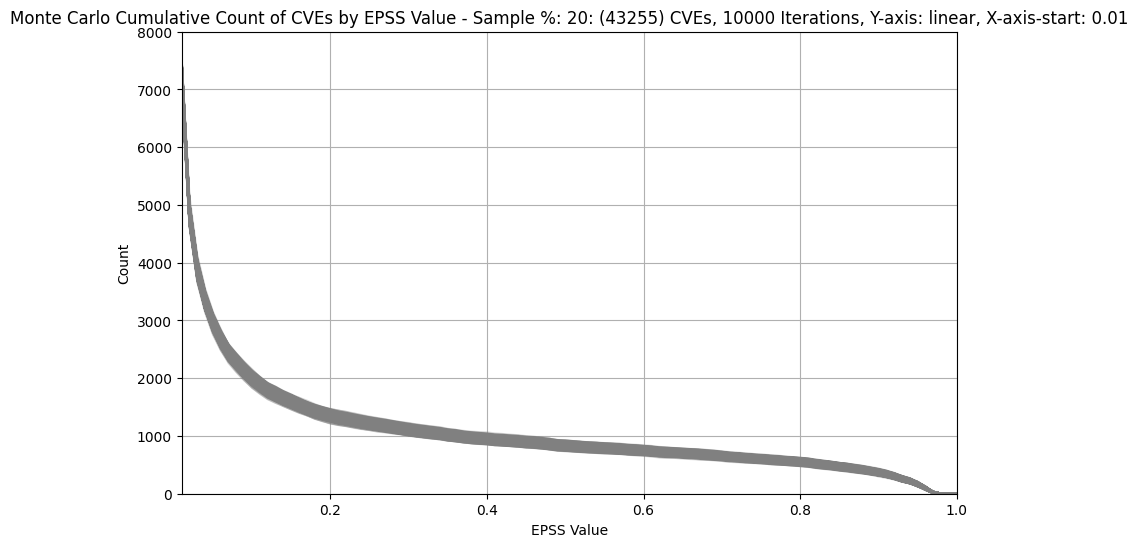

In [122]:
parameters = {'num_iterations': 10000, 'sample_percent': 20, 'x_lower_lim': 0.01, 'y_upper_lim': 8000, 'yscale': "linear", 'xscale': "linear"}
cve_count = round((parameters["sample_percent"]/100)*len(filtered_df))
Title = f'Monte Carlo Cumulative Count of CVEs by EPSS Value - Sample %: {parameters["sample_percent"]}: ({cve_count}) CVEs, {parameters["num_iterations"]} Iterations, Y-axis: {parameters["yscale"]}, X-axis-start: {parameters["x_lower_lim"]}'
all_cumulative_counts = plot_count_of_cves_above_epss (filtered_df, Title, **parameters)

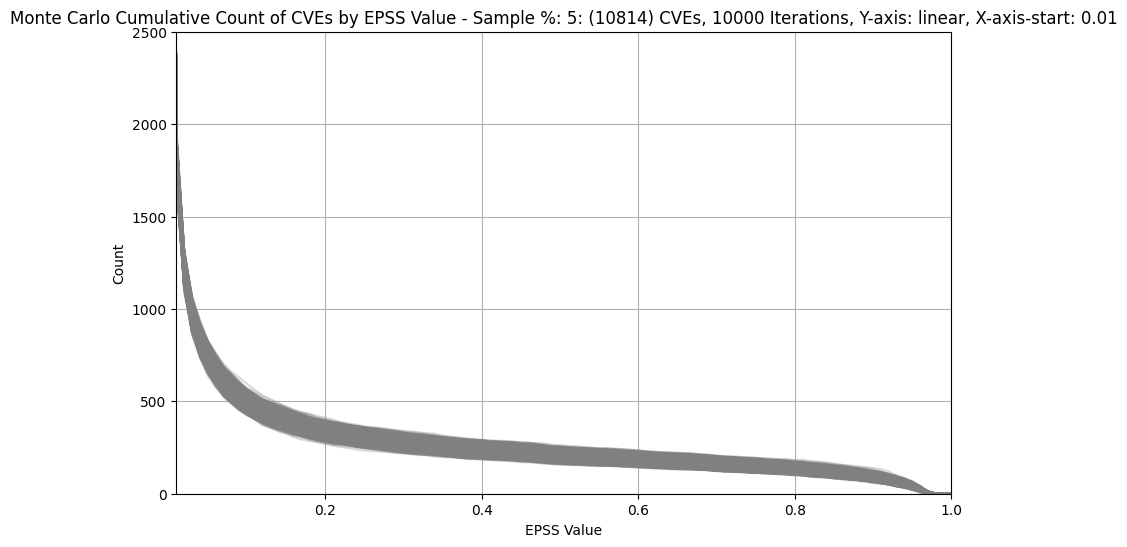

In [124]:
parameters = {'num_iterations': 10000, 'sample_percent': 5, 'x_lower_lim': 0.01, 'y_upper_lim': 2500, 'yscale': "linear", 'xscale': "linear"}
cve_count = round((parameters["sample_percent"]/100)*len(filtered_df))
Title = f'Monte Carlo Cumulative Count of CVEs by EPSS Value - Sample %: {parameters["sample_percent"]}: ({cve_count}) CVEs, {parameters["num_iterations"]} Iterations, Y-axis: {parameters["yscale"]}, X-axis-start: {parameters["x_lower_lim"]}'
all_cumulative_counts = plot_count_of_cves_above_epss (filtered_df, Title, **parameters)

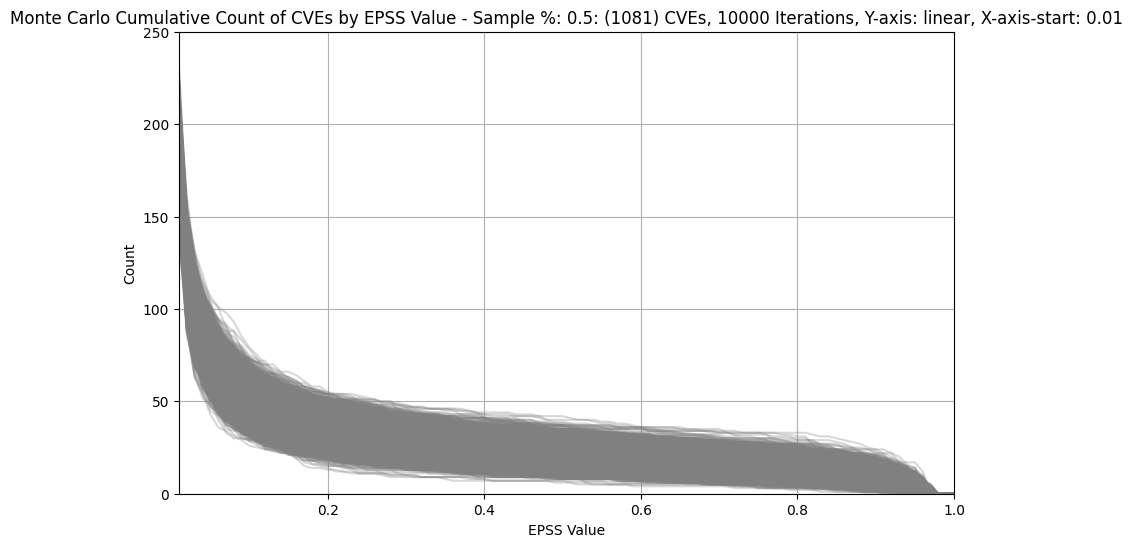

In [126]:
parameters = {'num_iterations': 10000, 'sample_percent': .5, 'x_lower_lim': 0.01, 'y_upper_lim': 250, 'yscale': "linear", 'xscale': "linear"}
cve_count = round((parameters["sample_percent"]/100)*len(filtered_df))
Title = f'Monte Carlo Cumulative Count of CVEs by EPSS Value - Sample %: {parameters["sample_percent"]}: ({cve_count}) CVEs, {parameters["num_iterations"]} Iterations, Y-axis: {parameters["yscale"]}, X-axis-start: {parameters["x_lower_lim"]}'
all_cumulative_counts = plot_count_of_cves_above_epss (filtered_df, Title, **parameters)